HYPOTHESIS 2:
There is racism prevelant against the victims of certain crimes.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
complaints_df = pd.read_csv('C:/Users/megha/Downloads/NYPD_Complaint_Data_Historic.csv',low_memory = False)

In [41]:
complaints_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.0,08/30/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018029.0,240747.0,NaN,UNKNOWN,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.0,11/05/2006,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,982556.0,171385.0,NaN,NaN,NaN,NaN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,09/09/2006,00:01:00,106.0,09/09/2006,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1028213.0,186786.0,NaN,NaN,NaN,NaN,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.0,12/13/2011,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000788.0,189718.0,NaN,NaN,NaN,NaN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.0,08/14/2009,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000029.0,242245.0,NaN,NaN,NaN,NaN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E


In [69]:
#complaints_df.columns
#complaints_df.LAW_CAT_CD.unique()
complaints_df.VIC_RACE.unique()

array(['VIOLATION', 'FELONY', 'MISDEMEANOR'], dtype=object)

In [70]:
pd.set_option("display.max_rows",404)
pd.set_option("display.max_columns",404)


In [71]:
complaints_df.VIC_RACE = complaints_df.VIC_RACE.fillna('UNKNOWN') #replacing nans with 'UNKNOWN'
complaints_df.VIC_RACE.unique()
complaints_df = complaints_df.replace({'VIC_RACE': 'UNKNOWN'}, 'UNKNOWN/OTHER')
complaints_df = complaints_df.replace({'VIC_RACE': 'OTHER'}, 'UNKNOWN/OTHER')

In [72]:
#Selecting particular crimes
type_of_crime = ['HARRASSMENT 2','BURGLARY','ROBBERY','FELONY ASSAULT','SEX CRIMES','OFFENSES INVOLVING FRAUD','RAPE','THEFT-FRAUD','MURDER & NON-NEGL. MANSLAUGHTER','KIDNAPPING & RELATED OFFENSES','OFFENSES RELATED TO CHILDREN','KIDNAPPING','OTHER OFFENSES RELATED TO THEF','PETIT LARCENY','GRAND LARCENY','FORGERY','FRAUDS','ASSAULT 3 & RELATED OFFENSES']
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
complaints_df_new =complaints_df[complaints_df.OFNS_DESC.isin(type_of_crime)]
complaints_df_new
#complaints_df_new.OFNS_DESC.unique()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.0,08/30/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018029.0,240747.0,NaN,UNKNOWN,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.0,11/05/2006,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,982556.0,171385.0,NaN,NaN,NaN,NaN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.0,12/13/2011,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000788.0,189718.0,NaN,NaN,NaN,NaN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN/OTHER,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.0,08/14/2009,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000029.0,242245.0,NaN,NaN,NaN,NaN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN/OTHER,E
5,605915885,10/27/2009,21:10:00,NaN,NaN,69.0,10/29/2009,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1010598.0,173684.0,NaN,BLACK,M,NaN,40.643368,-73.905059,"(40.643368102, -73.905059257)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6847932,872275533,07/22/2017,13:15:00,07/22/2017,13:25:00,18.0,07/22/2017,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,HOTEL/MOTEL,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,987453.0,216762.0,UNKNOWN,UNKNOWN,M,NaN,40.761646,-73.988439,"(40.761645718, -73.98843929)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE HISPANIC,M
6847939,954636350,08/23/2015,02:00:00,08/23/2015,02:10:00,75.0,08/23/2015,340,FRAUDS,707.0,"IMPERSONATION 2, PUBLIC SERVAN",COMPLETED,MISDEMEANOR,BROOKLYN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018767.0,184224.0,NaN,NaN,NaN,NaN,40.672270,-73.875569,"(40.672269995, -73.875569231)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN/OTHER,E
6847940,960069040,06/15/2013,11:30:00,06/15/2013,11:35:00,32.0,06/15/2013,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,NaN,4552,1001752.0,241629.0,NaN,UNKNOWN,M,NaN,40.829882,-73.936758,"(40.829882139, -73.9367581)",PATROL BORO MAN NORTH,NaN,45-64,BLACK,M
6847941,131686727,07/12/2012,14:00:00,07/12/2012,14:05:00,49.0,07/12/2012,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1024945.0,247745.0,NaN,NaN,NaN,NaN,40.846592,-73.852913,"(40.846592354, -73.852913364)",PATROL BORO BRONX,NaN,18-24,WHITE,M


In [146]:
#race_count = complaints_df_new.groupby(['OFNS_DESC','VIC_RACE']).agg({'CMPLNT_NUM': ['count']}).reset_index()

r1 = complaints_df_new.groupby(["OFNS_DESC", "VIC_RACE"], as_index=False).count()
race_count_new = r1[['OFNS_DESC','VIC_RACE','CMPLNT_NUM']]
race_count_new

,OFNS_DESC,VIC_RACE,CMPLNT_NUM
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494
9,BURGLARY,BLACK,41857


In [143]:
race_count

,OFNS_DESC,VIC_RACE,CMPLNT_NUM
,,,count
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494


In [139]:
#https://worldpopulationreview.com/us-cities/new-york-city-population/
#total NYC population = 8175133
# AMERICAN INDIAN/ALASKAN NATIVE  0.43    `   
# ASIAN / PACIFIC ISLANDER  13.95 + 0.05       
# BLACK            21.95                
# BLACK HISPANIC      2.33               
# UNKNOWN/OTHER     18.62                
# WHITE           32.14                  
# WHITE HISPANIC     10.53    
#Creating a function to add crime per capita values
def race_percentage(row):  #https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
   if row['VIC_RACE'] == 'AMERICAN INDIAN/ALASKAN NATIVE' :
      return 0.0043
   if row['VIC_RACE'] == 'ASIAN / PACIFIC ISLANDER':
      return 0.14
   if row['VIC_RACE'] == 'BLACK' :
      return 0.2195
   if row['VIC_RACE'] == 'BLACK HISPANIC':
      return 0.0233
   if row['VIC_RACE'] == 'WHITE':
      return 0.3214
   if row['VIC_RACE'] == 'WHITE HISPANIC':
      return 0.1053
   if row['VIC_RACE']  == 'UNKNOWN/OTHER':
      return 0.1862

In [147]:
race_count_new.apply (lambda row: race_percentage(row), axis=1)

0      0.0043
1      0.1400
2      0.2195
3      0.0233
4      0.1862
5      0.3214
6      0.1053
7      0.0043
8      0.1400
9      0.2195
10     0.0233
11     0.1862
12     0.3214
13     0.1053
14     0.0043
15     0.1400
16     0.2195
17     0.0233
18     0.1862
19     0.3214
20     0.1053
21     0.0043
22     0.1400
23     0.2195
24     0.0233
25     0.1862
26     0.3214
27     0.1053
28     0.0043
29     0.1400
30     0.2195
31     0.0233
32     0.1862
33     0.3214
34     0.1053
35     0.0043
36     0.1400
37     0.2195
38     0.0233
39     0.1862
40     0.3214
41     0.1053
42     0.0043
43     0.1400
44     0.2195
45     0.0233
46     0.1862
47     0.3214
48     0.1053
49     0.2195
50     0.0233
51     0.1862
52     0.3214
53     0.1053
54     0.0043
55     0.1400
56     0.2195
57     0.0233
58     0.1862
59     0.3214
60     0.1053
61     0.0043
62     0.1400
63     0.2195
64     0.0233
65     0.1862
66     0.3214
67     0.1053
68     0.0043
69     0.1400
70     0.2195
71    

In [156]:
race_count_new['race_percentage'] = race_count_new.apply (lambda row: race_percentage(row), axis=1)
#race_count_new['race_population'] = race_count_new['race_percentage']*8175133
race_count_new['race_population'] = race_count_new['race_population'].astype('int64')
race_count_new


C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,OFNS_DESC,VIC_RACE,CMPLNT_NUM,race_percentage,race_population
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724,0.0043,35153
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057,0.1400,1144518
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634,0.2195,1794441
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888,0.0233,190480
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764,0.1862,1522209
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708,0.3214,2627487
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300,0.1053,860841
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379,0.0043,35153
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494,0.1400,1144518
9,BURGLARY,BLACK,41857,0.2195,1794441


HYPOTHESIS 3:

The population density of a neighborhood impacts the number of complaints/crimes reported there.(E.g. Is there an inverse trend of the number of crimes with the population density or not).

In [159]:
area_count = complaints_df_new.groupby(['BORO_NM']).count()
area_count = area_count.reset_index()
area_count

,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,BRONX,870852,870780,870847,585258,585890,870784,870852,870852,870852,870852,870852,870852,870852,716020,867480,870852,870852,2821,44161,66469,821160,821160,338743,541162,524831,12853,821160,821160,821160,870785,12853,763697,870852,870841
1,BROOKLYN,1299950,1299811,1299945,1022309,1023250,1299890,1299950,1299950,1299950,1299950,1299950,1299950,1299950,1073850,1295528,1299950,1299950,4502,78756,93600,1233317,1233317,436462,759270,735882,23373,1233317,1233317,1233317,1299890,23373,1136680,1299950,1299927
2,MANHATTAN,1135553,1135442,1135545,860930,861637,1135505,1135553,1135553,1135553,1135553,1135553,1135550,1135553,936741,1126940,1135553,1135553,5360,32954,73957,1072079,1072079,346570,622021,588849,45113,1072079,1072079,1072079,1135506,45113,899453,1135553,1135540
3,QUEENS,880286,880173,880282,733685,734324,880259,880286,880286,880286,880286,880286,880286,880286,722502,876780,880286,880286,3261,10824,22089,833108,833108,293506,501438,484949,10531,833108,833108,833108,880259,10531,759886,880286,880280
4,STATEN ISLAND,193414,193403,193413,140368,140500,193408,193414,193414,193414,193414,193414,193414,193414,173408,192807,193414,193414,244,8056,8226,184633,184633,66289,109676,105931,0,184633,184633,184633,193361,0,167986,193414,193413


In [160]:
type(area_count)

pandas.core.frame.DataFrame

In [161]:
area_population = pd.read_csv('C:/Users/megha/Downloads/New_York_City_Population.csv')
area_population = area_population[area_population['Year'] > 2000]


In [56]:
#area_population

In [162]:
area_population_sum = area_population.groupby(['Borough'])['Population'].sum()
area_population_sum

Borough
Bronx            1385108
Brooklyn         2504700
Manhattan        1585873
Queens           2230722
Staten Island     468730
Name: Population, dtype: int64

In [78]:
type(area_population_sum)

pandas.core.series.Series

In [163]:
borough_pop_df = area_population_sum.to_frame().reset_index()

In [164]:
#https://en.wikipedia.org/wiki/Demographics_of_New_York_City
borough_pop_df['Area in sq. km'] = [109.04, 183.42, 59.13, 281.09, 151.18]

In [165]:
borough_pop_df['Population Density'] = borough_pop_df['Population']/borough_pop_df['Area in sq. km']
borough_pop_df['Borough'] = borough_pop_df['Borough'].str.upper() 
borough_pop_df = borough_pop_df.rename(columns={"Borough": "BORO_NM"})
borough_pop_df

,BORO_NM,Population,Area in sq. km,Population Density
0,BRONX,1385108,109.04,12702.751284
1,BROOKLYN,2504700,183.42,13655.544652
2,MANHATTAN,1585873,59.13,26820.108236
3,QUEENS,2230722,281.09,7935.970686
4,STATEN ISLAND,468730,151.18,3100.476253


In [166]:
#result_df = pd.concat([area_count, borough_pop_df], axis=1, join='inner')
result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], borough_pop_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
#result=result.sort_index(axis = 0) 
#area_count.merge(borough_pop_df, left_on='BORO_NM', right_on='BORO_NM')
result_df


,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,BRONX,870852,1385108,109.04,12702.751284
1,BROOKLYN,1299950,2504700,183.42,13655.544652
2,MANHATTAN,1135553,1585873,59.13,26820.108236
3,QUEENS,880286,2230722,281.09,7935.970686
4,STATEN ISLAND,193414,468730,151.18,3100.476253


In [171]:
result_df['crime per capita'] = result_df['CMPLNT_NUM']/result_df['Population']
result_df['Population Density'] = result_df['Population Density'].astype('int64')


In [173]:
result_df = result_df.sort_values(by = 'Population Density',ascending = False)
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita
2,MANHATTAN,1135553,1585873,59.13,26820,0.716043
1,BROOKLYN,1299950,2504700,183.42,13655,0.519004
0,BRONX,870852,1385108,109.04,12702,0.628725
3,QUEENS,880286,2230722,281.09,7935,0.394619
4,STATEN ISLAND,193414,468730,151.18,3100,0.412634


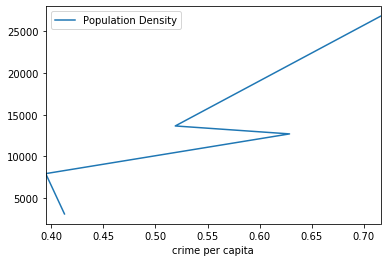

In [174]:
ax = plt.gca()
result_df.plot(kind='line',x='crime per capita',y='Population Density',ax=ax)
#result_df.plot(kind='line',x='BORO_NM',y='crime per capita', color='red', ax=ax)
plt.show()


# HYPOTHESIS 1:

There exists a trend between the type of crimes reported in NYC and the neighborhood they occurred in. (e.g. There are a greater number of theft cases in Brooklyn than any other region)

In [175]:
complaints_df_new.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [177]:
complaints_df_new.OFNS_DESC.unique()

array(['HARRASSMENT 2', 'BURGLARY', 'PETIT LARCENY', 'FORGERY', 'ROBBERY',
       'GRAND LARCENY', 'FRAUDS', 'ASSAULT 3 & RELATED OFFENSES',
       'FELONY ASSAULT', 'SEX CRIMES', 'OFFENSES INVOLVING FRAUD', 'RAPE',
       'THEFT-FRAUD', 'OTHER OFFENSES RELATED TO THEF',
       'KIDNAPPING & RELATED OFFENSES', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'OFFENSES RELATED TO CHILDREN', 'KIDNAPPING'], dtype=object)

In [187]:
#new_df = complaints_df_new.groupby(['OFNS_DESC', 'BORO_NM'],as_index = False).agg({'CMPLNT_NUM': ['count']}).reset_index()
#new_df = new_df.reset_index()
#new_df2 = new_df.unstack(level = 0)
#new_df
#new_df.reset_index()
#new_df
g1 = complaints_df_new.groupby(["OFNS_DESC", "BORO_NM"], as_index=False).count()
g1

,OFNS_DESC,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043,178032,178042,113643,113765,178034,178043,178043,178043,178043,178043,178043,148420,177393,178043,178043,500,13373,20261,167643,167643,89134,125614,123517,1781,167643,167643,167643,178034,1781,170347,178043,178042
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303,224297,224303,170712,170869,224300,224303,224303,224303,224303,224303,224303,182045,223702,224303,224303,795,22427,26563,213433,213433,99336,152937,149893,3872,213433,213433,213433,224300,3872,215349,224303,224302
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300,139286,139300,102257,102336,139293,139300,139300,139300,139300,139300,139300,107274,138736,139300,139300,660,8748,19927,130987,130987,60744,95936,93671,5741,130987,130987,130987,139293,5741,133143,139300,139299
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811,144799,144811,118660,118757,144809,144811,144811,144811,144811,144811,144811,115548,144399,144811,144811,540,3011,6145,136565,136565,65085,96199,94646,1354,136565,136565,136565,144809,1354,139319,144811,144809
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105,31104,31105,22382,22405,31105,31105,31105,31105,31105,31105,31105,26149,31034,31105,31105,55,2263,2317,29629,29629,14591,22588,21741,0,29629,29629,29629,31102,0,29823,31105,31105
5,BURGLARY,BRONX,42179,42174,42179,36592,36624,42166,42179,42179,42179,42179,42179,42179,41076,42015,42179,42179,38,1004,1472,40685,40685,6425,14131,12517,27,40685,40685,40685,42166,27,32324,42179,42176
6,BURGLARY,BROOKLYN,80640,80631,80640,74343,74383,80628,80640,80640,80640,80640,80640,80640,78856,80428,80640,80640,26,1779,2158,78094,78094,10336,25632,23096,95,78094,78094,78094,80628,95,62984,80640,80639
7,BURGLARY,MANHATTAN,44428,44420,44428,39961,39977,44426,44428,44428,44428,44428,44428,44428,43260,44062,44428,44428,53,598,1283,42640,42640,7515,19030,16371,44,42640,42640,42640,44426,44,27639,44428,44427
8,BURGLARY,QUEENS,59972,59963,59971,57169,57212,59970,59972,59972,59972,59972,59972,59972,59046,59830,59972,59972,39,204,408,58203,58203,6864,18850,16779,27,58203,58203,58203,59970,27,48578,59972,59972
9,BURGLARY,STATEN ISLAND,8414,8414,8414,7709,7720,8412,8414,8414,8414,8414,8414,8414,8330,8389,8414,8414,5,79,74,8204,8204,749,1775,1577,0,8204,8204,8204,8411,0,6367,8414,8414


In [179]:
#Creating a function to add crime per capita values
def label_per_capita(row):  #https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
   if row['BORO_NM'] == 'BRONX' :
      return 0.628725
   if row['BORO_NM'] == 'BROOKLYN':
      return 0.519004
   if row['BORO_NM'] == 'MANHATTAN' :
      return 0.716043
   if row['BORO_NM'] == 'QUEENS':
      return 0.394619
   if row['BORO_NM']  == 'STATEN ISLAND':
      return 0.412634

In [188]:
g1.apply (lambda row: label_per_capita(row), axis=1)

0     0.628725
1     0.519004
2     0.716043
3     0.394619
4     0.412634
5     0.628725
6     0.519004
7     0.716043
8     0.394619
9     0.412634
10    0.628725
11    0.519004
12    0.716043
13    0.394619
14    0.412634
15    0.628725
16    0.519004
17    0.716043
18    0.394619
19    0.412634
20    0.628725
21    0.519004
22    0.716043
23    0.394619
24    0.412634
25    0.628725
26    0.519004
27    0.716043
28    0.394619
29    0.412634
30    0.628725
31    0.519004
32    0.716043
33    0.394619
34    0.412634
35    0.628725
36    0.519004
37    0.716043
38    0.394619
39    0.412634
40    0.628725
41    0.519004
42    0.716043
43    0.394619
44    0.412634
45    0.628725
46    0.519004
47    0.716043
48    0.394619
49    0.412634
50    0.628725
51    0.519004
52    0.716043
53    0.394619
54    0.412634
55    0.628725
56    0.519004
57    0.716043
58    0.394619
59    0.412634
60    0.628725
61    0.519004
62    0.716043
63    0.394619
64    0.412634
65    0.628725
66    0.51

In [189]:
#Adding a new column with the crime per capita values
g1['crime rate per capita'] = g1.apply (lambda row: label_per_capita(row), axis=1)

In [193]:
g1

,OFNS_DESC,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,crime rate per capita
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043,178032,178042,113643,113765,178034,178043,178043,178043,178043,178043,178043,148420,177393,178043,178043,500,13373,20261,167643,167643,89134,125614,123517,1781,167643,167643,167643,178034,1781,170347,178043,178042,0.628725
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303,224297,224303,170712,170869,224300,224303,224303,224303,224303,224303,224303,182045,223702,224303,224303,795,22427,26563,213433,213433,99336,152937,149893,3872,213433,213433,213433,224300,3872,215349,224303,224302,0.519004
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300,139286,139300,102257,102336,139293,139300,139300,139300,139300,139300,139300,107274,138736,139300,139300,660,8748,19927,130987,130987,60744,95936,93671,5741,130987,130987,130987,139293,5741,133143,139300,139299,0.716043
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811,144799,144811,118660,118757,144809,144811,144811,144811,144811,144811,144811,115548,144399,144811,144811,540,3011,6145,136565,136565,65085,96199,94646,1354,136565,136565,136565,144809,1354,139319,144811,144809,0.394619
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105,31104,31105,22382,22405,31105,31105,31105,31105,31105,31105,31105,26149,31034,31105,31105,55,2263,2317,29629,29629,14591,22588,21741,0,29629,29629,29629,31102,0,29823,31105,31105,0.412634
5,BURGLARY,BRONX,42179,42174,42179,36592,36624,42166,42179,42179,42179,42179,42179,42179,41076,42015,42179,42179,38,1004,1472,40685,40685,6425,14131,12517,27,40685,40685,40685,42166,27,32324,42179,42176,0.628725
6,BURGLARY,BROOKLYN,80640,80631,80640,74343,74383,80628,80640,80640,80640,80640,80640,80640,78856,80428,80640,80640,26,1779,2158,78094,78094,10336,25632,23096,95,78094,78094,78094,80628,95,62984,80640,80639,0.519004
7,BURGLARY,MANHATTAN,44428,44420,44428,39961,39977,44426,44428,44428,44428,44428,44428,44428,43260,44062,44428,44428,53,598,1283,42640,42640,7515,19030,16371,44,42640,42640,42640,44426,44,27639,44428,44427,0.716043
8,BURGLARY,QUEENS,59972,59963,59971,57169,57212,59970,59972,59972,59972,59972,59972,59972,59046,59830,59972,59972,39,204,408,58203,58203,6864,18850,16779,27,58203,58203,58203,59970,27,48578,59972,59972,0.394619
9,BURGLARY,STATEN ISLAND,8414,8414,8414,7709,7720,8412,8414,8414,8414,8414,8414,8414,8330,8389,8414,8414,5,79,74,8204,8204,749,1775,1577,0,8204,8204,8204,8411,0,6367,8414,8414,0.412634


In [194]:
#result_df1 = pd.concat([new_df2, result_df], axis=1, join='outer')
#result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], borough_pop_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
g1['complaints per capita'] = g1['CMPLNT_NUM']*g1['crime rate per capita']
g1['complaints per capita'] = g1['complaints per capita'].astype('int64')
g1

,OFNS_DESC,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,crime rate per capita,complaints per capita
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043,178032,178042,113643,113765,178034,178043,178043,178043,178043,178043,178043,148420,177393,178043,178043,500,13373,20261,167643,167643,89134,125614,123517,1781,167643,167643,167643,178034,1781,170347,178043,178042,0.628725,111940
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303,224297,224303,170712,170869,224300,224303,224303,224303,224303,224303,224303,182045,223702,224303,224303,795,22427,26563,213433,213433,99336,152937,149893,3872,213433,213433,213433,224300,3872,215349,224303,224302,0.519004,116414
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300,139286,139300,102257,102336,139293,139300,139300,139300,139300,139300,139300,107274,138736,139300,139300,660,8748,19927,130987,130987,60744,95936,93671,5741,130987,130987,130987,139293,5741,133143,139300,139299,0.716043,99744
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811,144799,144811,118660,118757,144809,144811,144811,144811,144811,144811,144811,115548,144399,144811,144811,540,3011,6145,136565,136565,65085,96199,94646,1354,136565,136565,136565,144809,1354,139319,144811,144809,0.394619,57145
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105,31104,31105,22382,22405,31105,31105,31105,31105,31105,31105,31105,26149,31034,31105,31105,55,2263,2317,29629,29629,14591,22588,21741,0,29629,29629,29629,31102,0,29823,31105,31105,0.412634,12834
5,BURGLARY,BRONX,42179,42174,42179,36592,36624,42166,42179,42179,42179,42179,42179,42179,41076,42015,42179,42179,38,1004,1472,40685,40685,6425,14131,12517,27,40685,40685,40685,42166,27,32324,42179,42176,0.628725,26518
6,BURGLARY,BROOKLYN,80640,80631,80640,74343,74383,80628,80640,80640,80640,80640,80640,80640,78856,80428,80640,80640,26,1779,2158,78094,78094,10336,25632,23096,95,78094,78094,78094,80628,95,62984,80640,80639,0.519004,41852
7,BURGLARY,MANHATTAN,44428,44420,44428,39961,39977,44426,44428,44428,44428,44428,44428,44428,43260,44062,44428,44428,53,598,1283,42640,42640,7515,19030,16371,44,42640,42640,42640,44426,44,27639,44428,44427,0.716043,31812
8,BURGLARY,QUEENS,59972,59963,59971,57169,57212,59970,59972,59972,59972,59972,59972,59972,59046,59830,59972,59972,39,204,408,58203,58203,6864,18850,16779,27,58203,58203,58203,59970,27,48578,59972,59972,0.394619,23666
9,BURGLARY,STATEN ISLAND,8414,8414,8414,7709,7720,8412,8414,8414,8414,8414,8414,8414,8330,8389,8414,8414,5,79,74,8204,8204,749,1775,1577,0,8204,8204,8204,8411,0,6367,8414,8414,0.412634,3471


In [198]:
g2 = g1.groupby(['BORO_NM','OFNS_DESC']).agg({'complaints per capita': ['sum']})
g2
#g1.sort_values(['complaints per capita'], ascending=False)

complaints per capita
                                                               sum
BORO_NM       OFNS_DESC                                           
BRONX         ASSAULT 3 & RELATED OFFENSES                  111940
              BURGLARY                                       26518
              FELONY ASSAULT                                 43874
              FORGERY                                         7462
              FRAUDS                                          4540
              GRAND LARCENY                                  49637
              HARRASSMENT 2                                 118337
              KIDNAPPING                                         7
              KIDNAPPING & RELATED OFFENSES                    429
              OFFENSES INVOLVING FRAUD                        2831
              OFFENSES RELATED TO CHILDREN                     252
              OTHER OFFENSES RELATED TO THEF                  1810
              PETIT LARCENY                                 123257
              RAPE                                            2753
              ROBBERY                                        36881
              SEX CRIMES                                      9439
              THEFT-FRAUD                                     7551
BROOKLYN      ASSAULT 3 & RELATED OFFENSES                  116414
              BURGLARY                                       41852
              FELONY ASSAULT                                 44454
              FORGERY                                        10809
              FRAUDS                                          6100
              GRAND LARCENY                                  81455
              HARRASSMENT 2                                 133714
              KIDNAPPING                                         8
              KIDNAPPING & RELATED OFFENSES                    509
              OFFENSES INVOLVING FRAUD                        1533
              OFFENSES RELATED TO CHILDREN                     198
              OTHER OFFENSES RELATED TO THEF                  2287
              PETIT LARCENY                                 163965
              RAPE                                            3112
              ROBBERY                                        44453
              SEX CRIMES                                     13249
              THEFT-FRAUD                                    10559
MANHATTAN     ASSAULT 3 & RELATED OFFENSES                   99744
              BURGLARY                                       31812
              FELONY ASSAULT                                 33828
              FORGERY                                        14865
              FRAUDS                                          8891
              GRAND LARCENY                                 163434
              HARRASSMENT 2                                 123880
              KIDNAPPING                                         0
              KIDNAPPING & RELATED OFFENSES                    351
              OFFENSES INVOLVING FRAUD                        8851
              OFFENSES RELATED TO CHILDREN                      91
              OTHER OFFENSES RELATED TO THEF                  3068
              PETIT LARCENY                                 256268
              RAPE                                            3005
              ROBBERY                                        34965
              SEX CRIMES                                     14580
              THEFT-FRAUD                                    15463
QUEENS        ASSAULT 3 & RELATED OFFENSES                   57145
              BURGLARY                                       23666
              FELONY ASSAULT                                 19622
              FORGERY                                         5714
              FRAUDS                                          2993
              GRAND LARCENY                                  44048
              HARRASSMENT

Text(0.5, 1.0, 'STATEN ISLAND - Crime and Arrest count from 2006-2017')

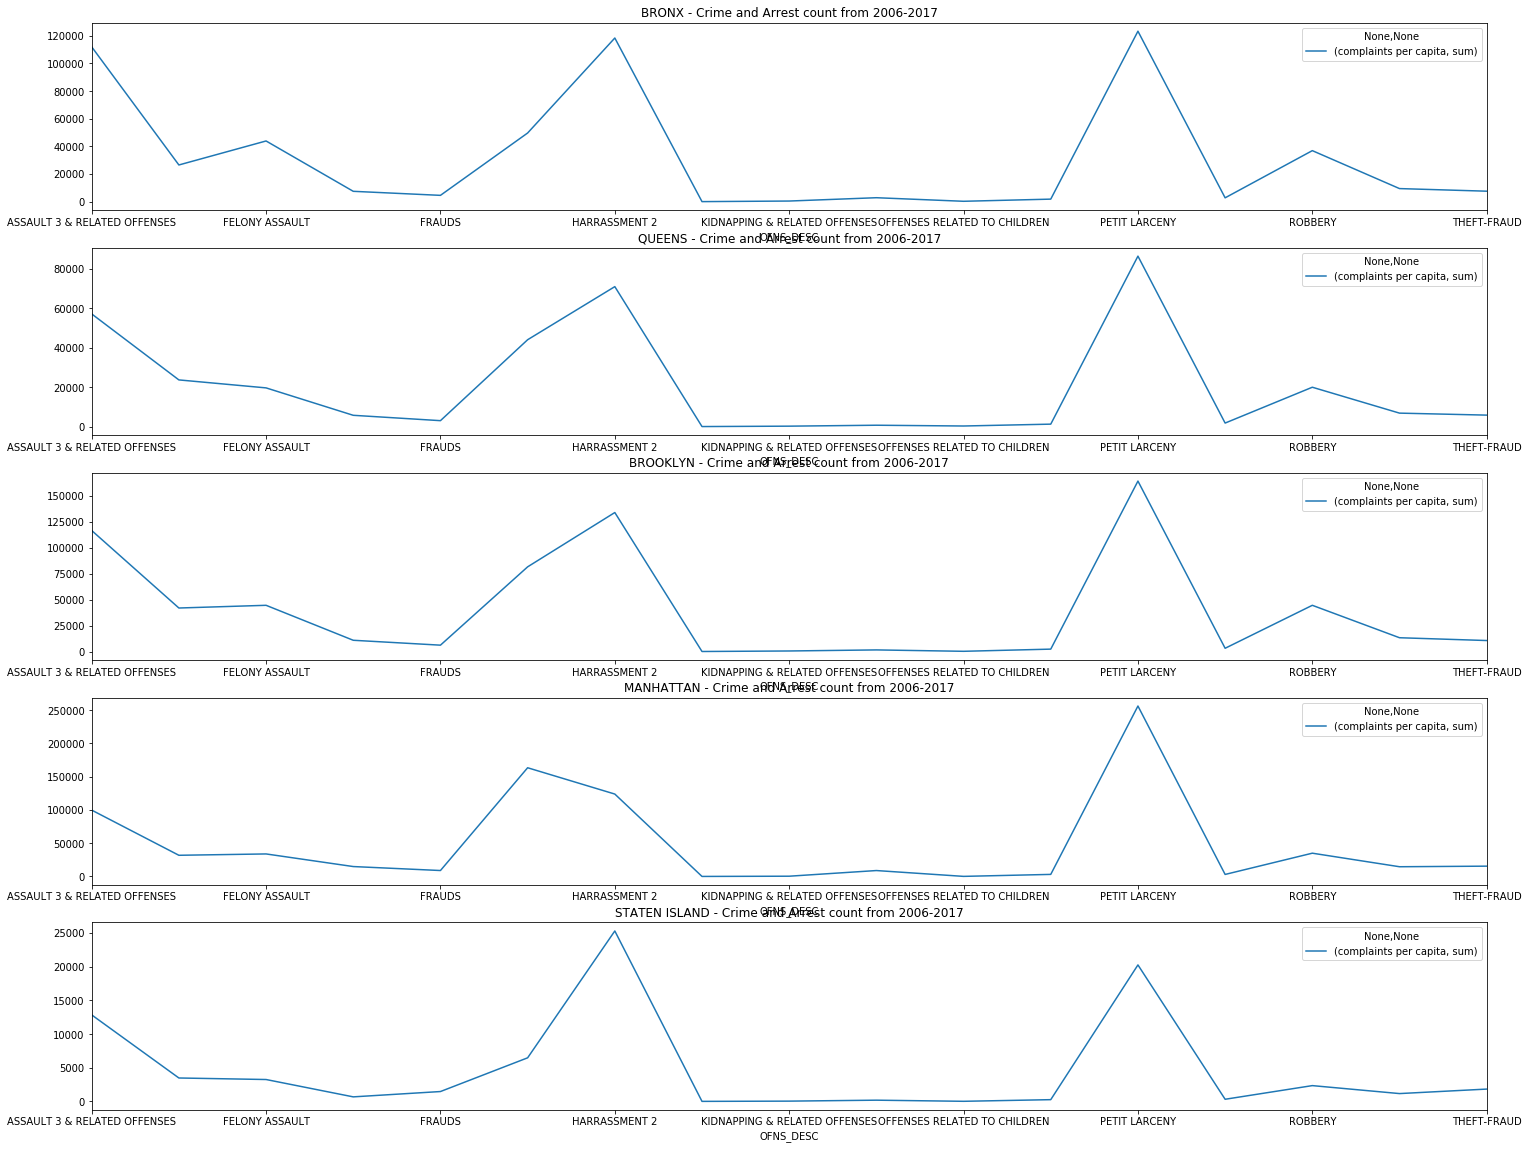

In [200]:
figure, axis = plt.subplots(5,1,figsize=(25,20)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
g2.xs('BRONX').plot(kind='line',ax=axis[0]).set_title('BRONX - Crime and Arrest count from 2006-2017') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
g2.xs('QUEENS').plot(kind='line',ax=axis[1]).set_title('QUEENS - Crime and Arrest count from 2006-2017') 
g2.xs('BROOKLYN').plot(kind='line',ax=axis[2]).set_title('BROOKLYN - Crime and Arrest count from 2006-2017') 
g2.xs('MANHATTAN').plot(kind='line',ax=axis[3]).set_title('MANHATTAN - Crime and Arrest count from 2006-2017') 
g2.xs('STATEN ISLAND').plot(kind='line',ax=axis[4]).set_title('STATEN ISLAND - Crime and Arrest count from 2006-2017') 


In [201]:
g3 = g1.groupby(['OFNS_DESC','BORO_NM']).agg({'complaints per capita': ['sum']})
g3
#g1.sort_values(['complaints per capita'], ascending=False)

complaints per capita
                                                               sum
OFNS_DESC                      BORO_NM                            
ASSAULT 3 & RELATED OFFENSES   BRONX                        111940
                               BROOKLYN                     116414
                               MANHATTAN                     99744
                               QUEENS                        57145
                               STATEN ISLAND                 12834
BURGLARY                       BRONX                         26518
                               BROOKLYN                      41852
                               MANHATTAN                     31812
                               QUEENS                        23666
                               STATEN ISLAND                  3471
FELONY ASSAULT                 BRONX                         43874
                               BROOKLYN                      44454
                               MANHATTAN                     33828
                               QUEENS                        19622
                               STATEN ISLAND                  3244
FORGERY                        BRONX                          7462
                               BROOKLYN                      10809
                               MANHATTAN                     14865
                               QUEENS                         5714
                               STATEN ISLAND                   669
FRAUDS                         BRONX                          4540
                               BROOKLYN                       6100
                               MANHATTAN                      8891
                               QUEENS                         2993
                               STATEN ISLAND                  1460
GRAND LARCENY                  BRONX                         49637
                               BROOKLYN                      81455
                               MANHATTAN                    163434
                               QUEENS                        44048
                               STATEN ISLAND                  6465
HARRASSMENT 2                  BRONX                        118337
                               BROOKLYN                     133714
                               MANHATTAN                    123880
                               QUEENS                        70986
                               STATEN ISLAND                 25292
KIDNAPPING                     BRONX                             7
                               BROOKLYN                          8
                               MANHATTAN                         0
                               QUEENS                            2
                               STATEN ISLAND                     0
KIDNAPPING & RELATED OFFENSES  BRONX                           429
                               BROOKLYN                        509
                               MANHATTAN                       351
                               QUEENS                          205
                               STATEN ISLAND                    36
OFFENSES INVOLVING FRAUD       BRONX                          2831
                               BROOKLYN                       1533
                               MANHATTAN                      8851
                               QUEENS                          679
                               STATEN ISLAND                   177
OFFENSES RELATED TO CHILDREN   BRONX                           252
                               BROOKLYN                        198
                               MANHATTAN                        91
                               QUEENS                          283
                               STATEN ISLAND                    11
OTHER OFFENSES RELATED TO THEF BRONX                          1810
                               BROOKLYN                       2287
                         

Text(0.5, 1.0, 'HARRASSMENT 2 - Crime count')

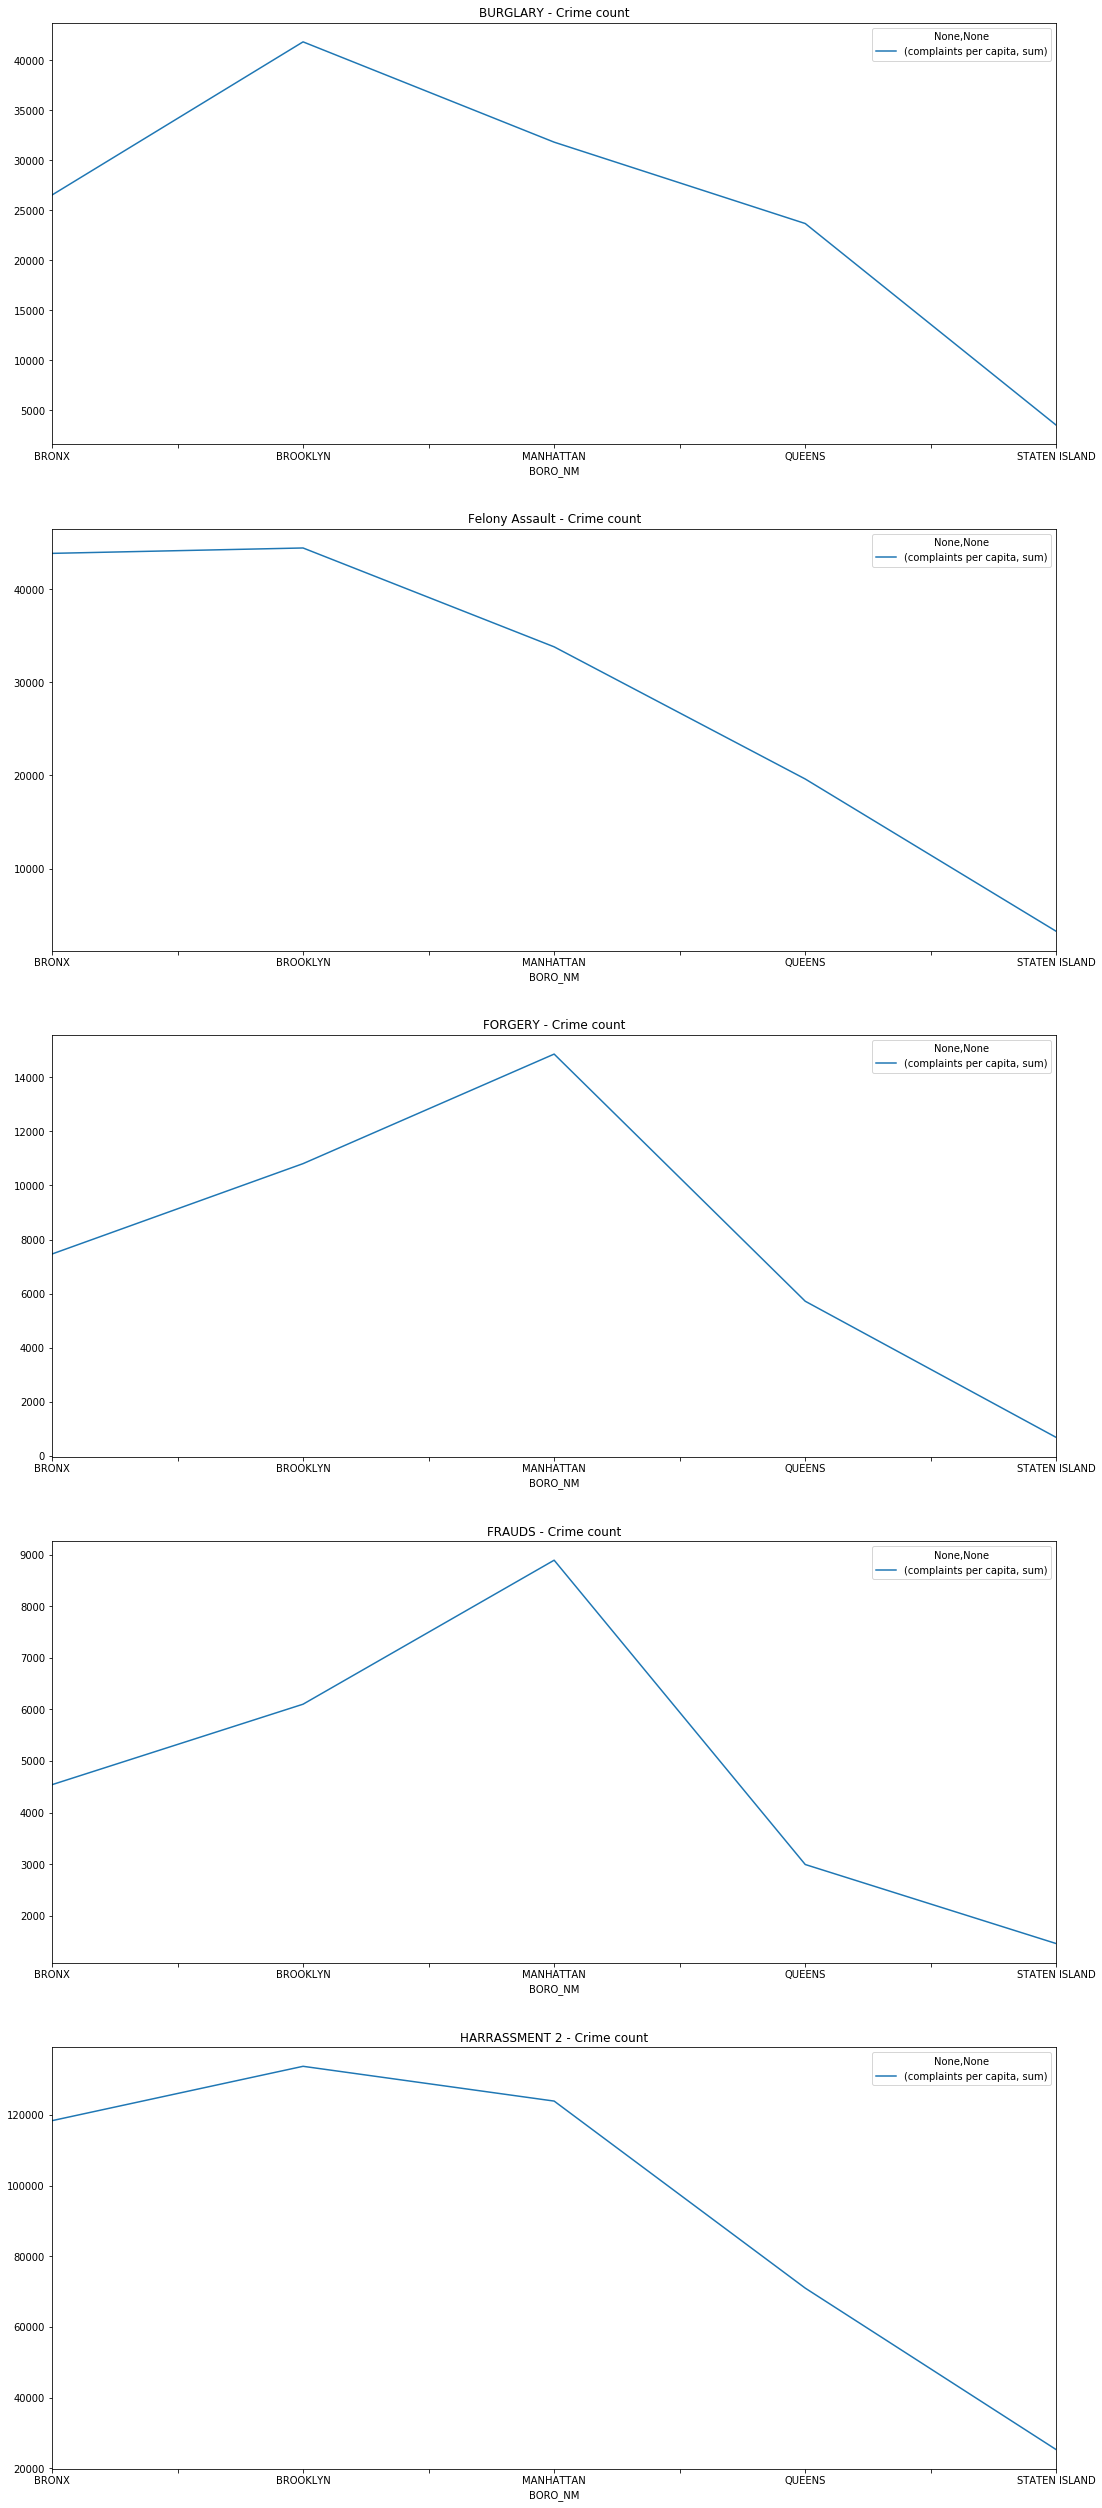

In [206]:
figure, axis = plt.subplots(5,1,figsize=(18,45)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
g3.xs('BURGLARY').plot(kind='line',ax=axis[0]).set_title('BURGLARY - Crime count') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
g3.xs('FELONY ASSAULT').plot(kind='line',ax=axis[1]).set_title('Felony Assault - Crime count') 
g3.xs('FORGERY').plot(kind='line',ax=axis[2]).set_title('FORGERY - Crime count') 
g3.xs('FRAUDS').plot(kind='line',ax=axis[3]).set_title('FRAUDS - Crime count') 
g3.xs('HARRASSMENT 2').plot(kind='line',ax=axis[4]).set_title('HARRASSMENT 2 - Crime count') 
